### Song lyrics for Robyn from azlyrics.com
https://www.azlyrics.com/r/robyn.html

In [57]:
#basic
import requests
import pandas as pd
import time
import numpy as np

# Topic Modeling
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

#scraping
from bs4 import BeautifulSoup

# text & nlp
import re
import string
import wordcloud
import spacy
from collections import Counter

#visualization
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
url = "https://www.lyrics.com/artist.php?name=Robyn&aid=214508&o=1"
response = requests.get(url)

# parse html
page = str(BeautifulSoup(response.content))
soup = BeautifulSoup(page, "lxml")

##### find_all with BeautifulSoup

In [3]:
lyrics = []
tables = soup.find_all(class_='tdata')
for t in tables:
    cells = t.find_all('td', class_="tal qx")
    for c in cells:
        links = c.find_all('a')
        for l in links:
            #print(l.text)
            #print(l['href'])
            lyrics.append((l['href']))

In [4]:
#convert into dataframe
df_lyrics = pd.DataFrame(lyrics)
#keep only lyrics links
df_lyrics = df_lyrics[df_lyrics[0].str.contains('lyric')]
#create full url
df_lyrics['url'] ='https://www.lyrics.com'+df_lyrics[0]

In [5]:
df_lyrics['url'].head()

0    https://www.lyrics.com/lyric/6774767/Robyn/Ain...
2    https://www.lyrics.com/lyric/14076015/Robyn/An...
4    https://www.lyrics.com/lyric/11948027/Robyn/An...
6    https://www.lyrics.com/lyric/10529309/Robyn/An...
8    https://www.lyrics.com/lyric/35561128/Robyn/Ba...
Name: url, dtype: object

##### findall with re

In [6]:
#re.findall('<a href=\"/lyric/+[a-z]+.\">$', str(soup), re.IGNORECASE)
links_m2 = re.findall('href=..lyric.\d+.Robyn.[^\"]+', str(soup), re.IGNORECASE)
#links_m2

In [7]:
#convert into dataframe
df_lyrics2 = pd.DataFrame(links_m2)

In [8]:
#create full url
df_lyrics2['url'] ='https://www.lyrics.com'+df_lyrics2[0].astype(str).str[6:]

In [9]:
df_lyrics2['url'].head()

0    https://www.lyrics.com/lyric/6774767/Robyn/Ain...
1    https://www.lyrics.com/lyric/14076015/Robyn/An...
2    https://www.lyrics.com/lyric/11948027/Robyn/An...
3    https://www.lyrics.com/lyric/10529309/Robyn/An...
4    https://www.lyrics.com/lyric/35561128/Robyn/Ba...
Name: url, dtype: object

##### pull lyrics

In [10]:
# for testing with just 3 urls
# df_url = df_lyrics['url'].head(3)

df_url = df_lyrics['url']

In [11]:
# parse all lyrics  and save as html files
"""for l in df_url:
    time.sleep(20)
    url = df_url
    response = requests.get(l)
    page = BeautifulSoup(response.content)
    filename = l.rsplit('/', 1)[-1]
    filename = re.sub('[^a-zA-Z0-9-_*.]', '', filename)
    page = page.prettify("utf-8")
    with open(f'lyrics_{filename}.html', "wb") as file:
        file.write(page)   """

'for l in df_url:\n    time.sleep(20)\n    url = df_url\n    response = requests.get(l)\n    page = BeautifulSoup(response.content)\n    filename = l.rsplit(\'/\', 1)[-1]\n    filename = re.sub(\'[^a-zA-Z0-9-_*.]\', \'\', filename)\n    page = page.prettify("utf-8")\n    with open(f\'lyrics_{filename}.html\', "wb") as file:\n        file.write(page)   '

#### Load and clean pages

In [12]:
# testing with just one specific html
# soup = BeautifulSoup(open("lyrics_Ain27tNoThing.html"), "html.parser")
# print(soup.prettify())

In [39]:
# function to clean html bodies
def cleaning(soup):
    # filter only for body with lyrics
    lyric = soup.find(class_='lyric-body').get_text()
    #replace abc't 
    lyric = lyric.replace('\'t','t')
    #replace line breaks
    lyric = lyric.replace('\n',' ')
    #replace â
    lyric = lyric.replace('â','')
    #replace inã
    lyric = lyric.replace('inã','ing')
    # remove words shorter than 3 characters
    shortword = re.compile(r'\W*\b\w{1,3}\b')
    lyric = shortword.sub('', lyric)
    # convert into lower caps
    lyric = lyric.lower()
    # exclude numbers
    lyric = ''.join(i for i in lyric if not i.isdigit())
    # special characters
    chars = re.escape(string.punctuation)
    lyric = re.sub(r'['+chars+']', '',lyric)
    return lyric
    

#### Merging lyrics

In [40]:
# loading all lyrics html from local directory and applying the cleaning 
all_lyrics = ""
for l in df_url:
    filename = l.rsplit('/', 1)[-1]
    filename = re.sub('[^a-zA-Z0-9-_*.]', '', filename)
    soup = BeautifulSoup(open(f'lyrics_{filename}.html'), "html.parser")
    text = cleaning(soup)
    all_lyrics += text

In [41]:
# saving combined lyrics locally
f = open('all_lyrics.csv','w')
f.write(all_lyrics) #Give your csv text here.
f.close()

In [42]:
all_lyrics

' gotta want really really want gotta need cause baby cant enough trying catch feeling used used feel back then saying that aint thing baby aint thing baby thing there nothing nothing said might wanna write this down know want really really want really need dont wanna pick your socks maybe really silly thing baby would just nice compromise saying that aint thing baby aint thing baby thing there nothing nothing saying that aint thing baby aint thing baby thing there nothing nothing maybe really silly thing baby would just nice compromise  aint thing aint thing saying that aint thing baby aint thing baby thing there nothing nothing saying that aint thing baby aint thing baby thing there nothing nothing  like waiting start  there right moment break heart tell anytime like could talk week myself sleep pink silk sheets tell anytime like tell anytime like  under pressure  alright  under pressure  under pressure uptight  under pressure yeah keep quiet hope forget know that kitchen table tell 

#### Spacy

In [45]:
# Check pre-defined stop words
spacy_nlp = spacy.load('en_core_web_sm')
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
print('Number of stop words: %d' % len(spacy_stopwords))
print('First ten stop words: %s' % list(spacy_stopwords)[:10])

Number of stop words: 305
First ten stop words: ['anything', 'because', 'between', 'per', 'at', 'former', 'moreover', 'in', 'ten', 'throughout']


In [46]:
#Remove stop words
doc = spacy_nlp(all_lyrics)
tokens = [token.text for token in doc if not token.is_stop]

print('Original Article: %s' % (all_lyrics))
print()
print(tokens)

Original Article:  gotta want really really want gotta need cause baby cant enough trying catch feeling used used feel back then saying that aint thing baby aint thing baby thing there nothing nothing said might wanna write this down know want really really want really need dont wanna pick your socks maybe really silly thing baby would just nice compromise saying that aint thing baby aint thing baby thing there nothing nothing saying that aint thing baby aint thing baby thing there nothing nothing maybe really silly thing baby would just nice compromise  aint thing aint thing saying that aint thing baby aint thing baby thing there nothing nothing saying that aint thing baby aint thing baby thing there nothing nothing  like waiting start  there right moment break heart tell anytime like could talk week myself sleep pink silk sheets tell anytime like tell anytime like  under pressure  alright  under pressure  under pressure uptight  under pressure yeah keep quiet hope forget know that ki

[' ', 'got', 'ta', 'want', 'want', 'got', 'ta', 'need', 'cause', 'baby', 'nt', 'trying', 'catch', 'feeling', 'feel', 'saying', 'ai', 'nt', 'thing', 'baby', 'ai', 'nt', 'thing', 'baby', 'thing', 'said', 'wanna', 'write', 'know', 'want', 'want', 'need', 'nt', 'wanna', 'pick', 'socks', 'maybe', 'silly', 'thing', 'baby', 'nice', 'compromise', 'saying', 'ai', 'nt', 'thing', 'baby', 'ai', 'nt', 'thing', 'baby', 'thing', 'saying', 'ai', 'nt', 'thing', 'baby', 'ai', 'nt', 'thing', 'baby', 'thing', 'maybe', 'silly', 'thing', 'baby', 'nice', 'compromise', ' ', 'ai', 'nt', 'thing', 'ai', 'nt', 'thing', 'saying', 'ai', 'nt', 'thing', 'baby', 'ai', 'nt', 'thing', 'baby', 'thing', 'saying', 'ai', 'nt', 'thing', 'baby', 'ai', 'nt', 'thing', 'baby', 'thing', ' ', 'like', 'waiting', 'start', ' ', 'right', 'moment', 'break', 'heart', 'tell', 'anytime', 'like', 'talk', 'week', 'sleep', 'pink', 'silk', 'sheets', 'tell', 'anytime', 'like', 'tell', 'anytime', 'like', ' ', 'pressure', ' ', 'alright', ' ', 'p

In [52]:
#Add customize stop words
customize_stop_words = [
    'knowdidididididi', 'zoom','aprã©ndelo','entiã©ndelo','digo','sãlo',
    'nt',' '
]

for w in customize_stop_words:
    spacy_nlp.vocab[w].is_stop = True

doc = spacy_nlp(all_lyrics)
tokens = [token.text for token in doc if not token.is_stop]

print('Original Article: %s' % (all_lyrics))
print()
print(tokens)

Original Article:  gotta want really really want gotta need cause baby cant enough trying catch feeling used used feel back then saying that aint thing baby aint thing baby thing there nothing nothing said might wanna write this down know want really really want really need dont wanna pick your socks maybe really silly thing baby would just nice compromise saying that aint thing baby aint thing baby thing there nothing nothing saying that aint thing baby aint thing baby thing there nothing nothing maybe really silly thing baby would just nice compromise  aint thing aint thing saying that aint thing baby aint thing baby thing there nothing nothing saying that aint thing baby aint thing baby thing there nothing nothing  like waiting start  there right moment break heart tell anytime like could talk week myself sleep pink silk sheets tell anytime like tell anytime like  under pressure  alright  under pressure  under pressure uptight  under pressure yeah keep quiet hope forget know that ki

['got', 'ta', 'want', 'want', 'got', 'ta', 'need', 'cause', 'baby', 'trying', 'catch', 'feeling', 'feel', 'saying', 'ai', 'thing', 'baby', 'ai', 'thing', 'baby', 'thing', 'said', 'wanna', 'write', 'know', 'want', 'want', 'need', 'wanna', 'pick', 'socks', 'maybe', 'silly', 'thing', 'baby', 'nice', 'compromise', 'saying', 'ai', 'thing', 'baby', 'ai', 'thing', 'baby', 'thing', 'saying', 'ai', 'thing', 'baby', 'ai', 'thing', 'baby', 'thing', 'maybe', 'silly', 'thing', 'baby', 'nice', 'compromise', 'ai', 'thing', 'ai', 'thing', 'saying', 'ai', 'thing', 'baby', 'ai', 'thing', 'baby', 'thing', 'saying', 'ai', 'thing', 'baby', 'ai', 'thing', 'baby', 'thing', 'like', 'waiting', 'start', 'right', 'moment', 'break', 'heart', 'tell', 'anytime', 'like', 'talk', 'week', 'sleep', 'pink', 'silk', 'sheets', 'tell', 'anytime', 'like', 'tell', 'anytime', 'like', 'pressure', 'alright', 'pressure', 'pressure', 'uptight', 'pressure', 'yeah', 'quiet', 'hope', 'forget', 'know', 'kitchen', 'table', 'tell', 'an

#### wordcloud

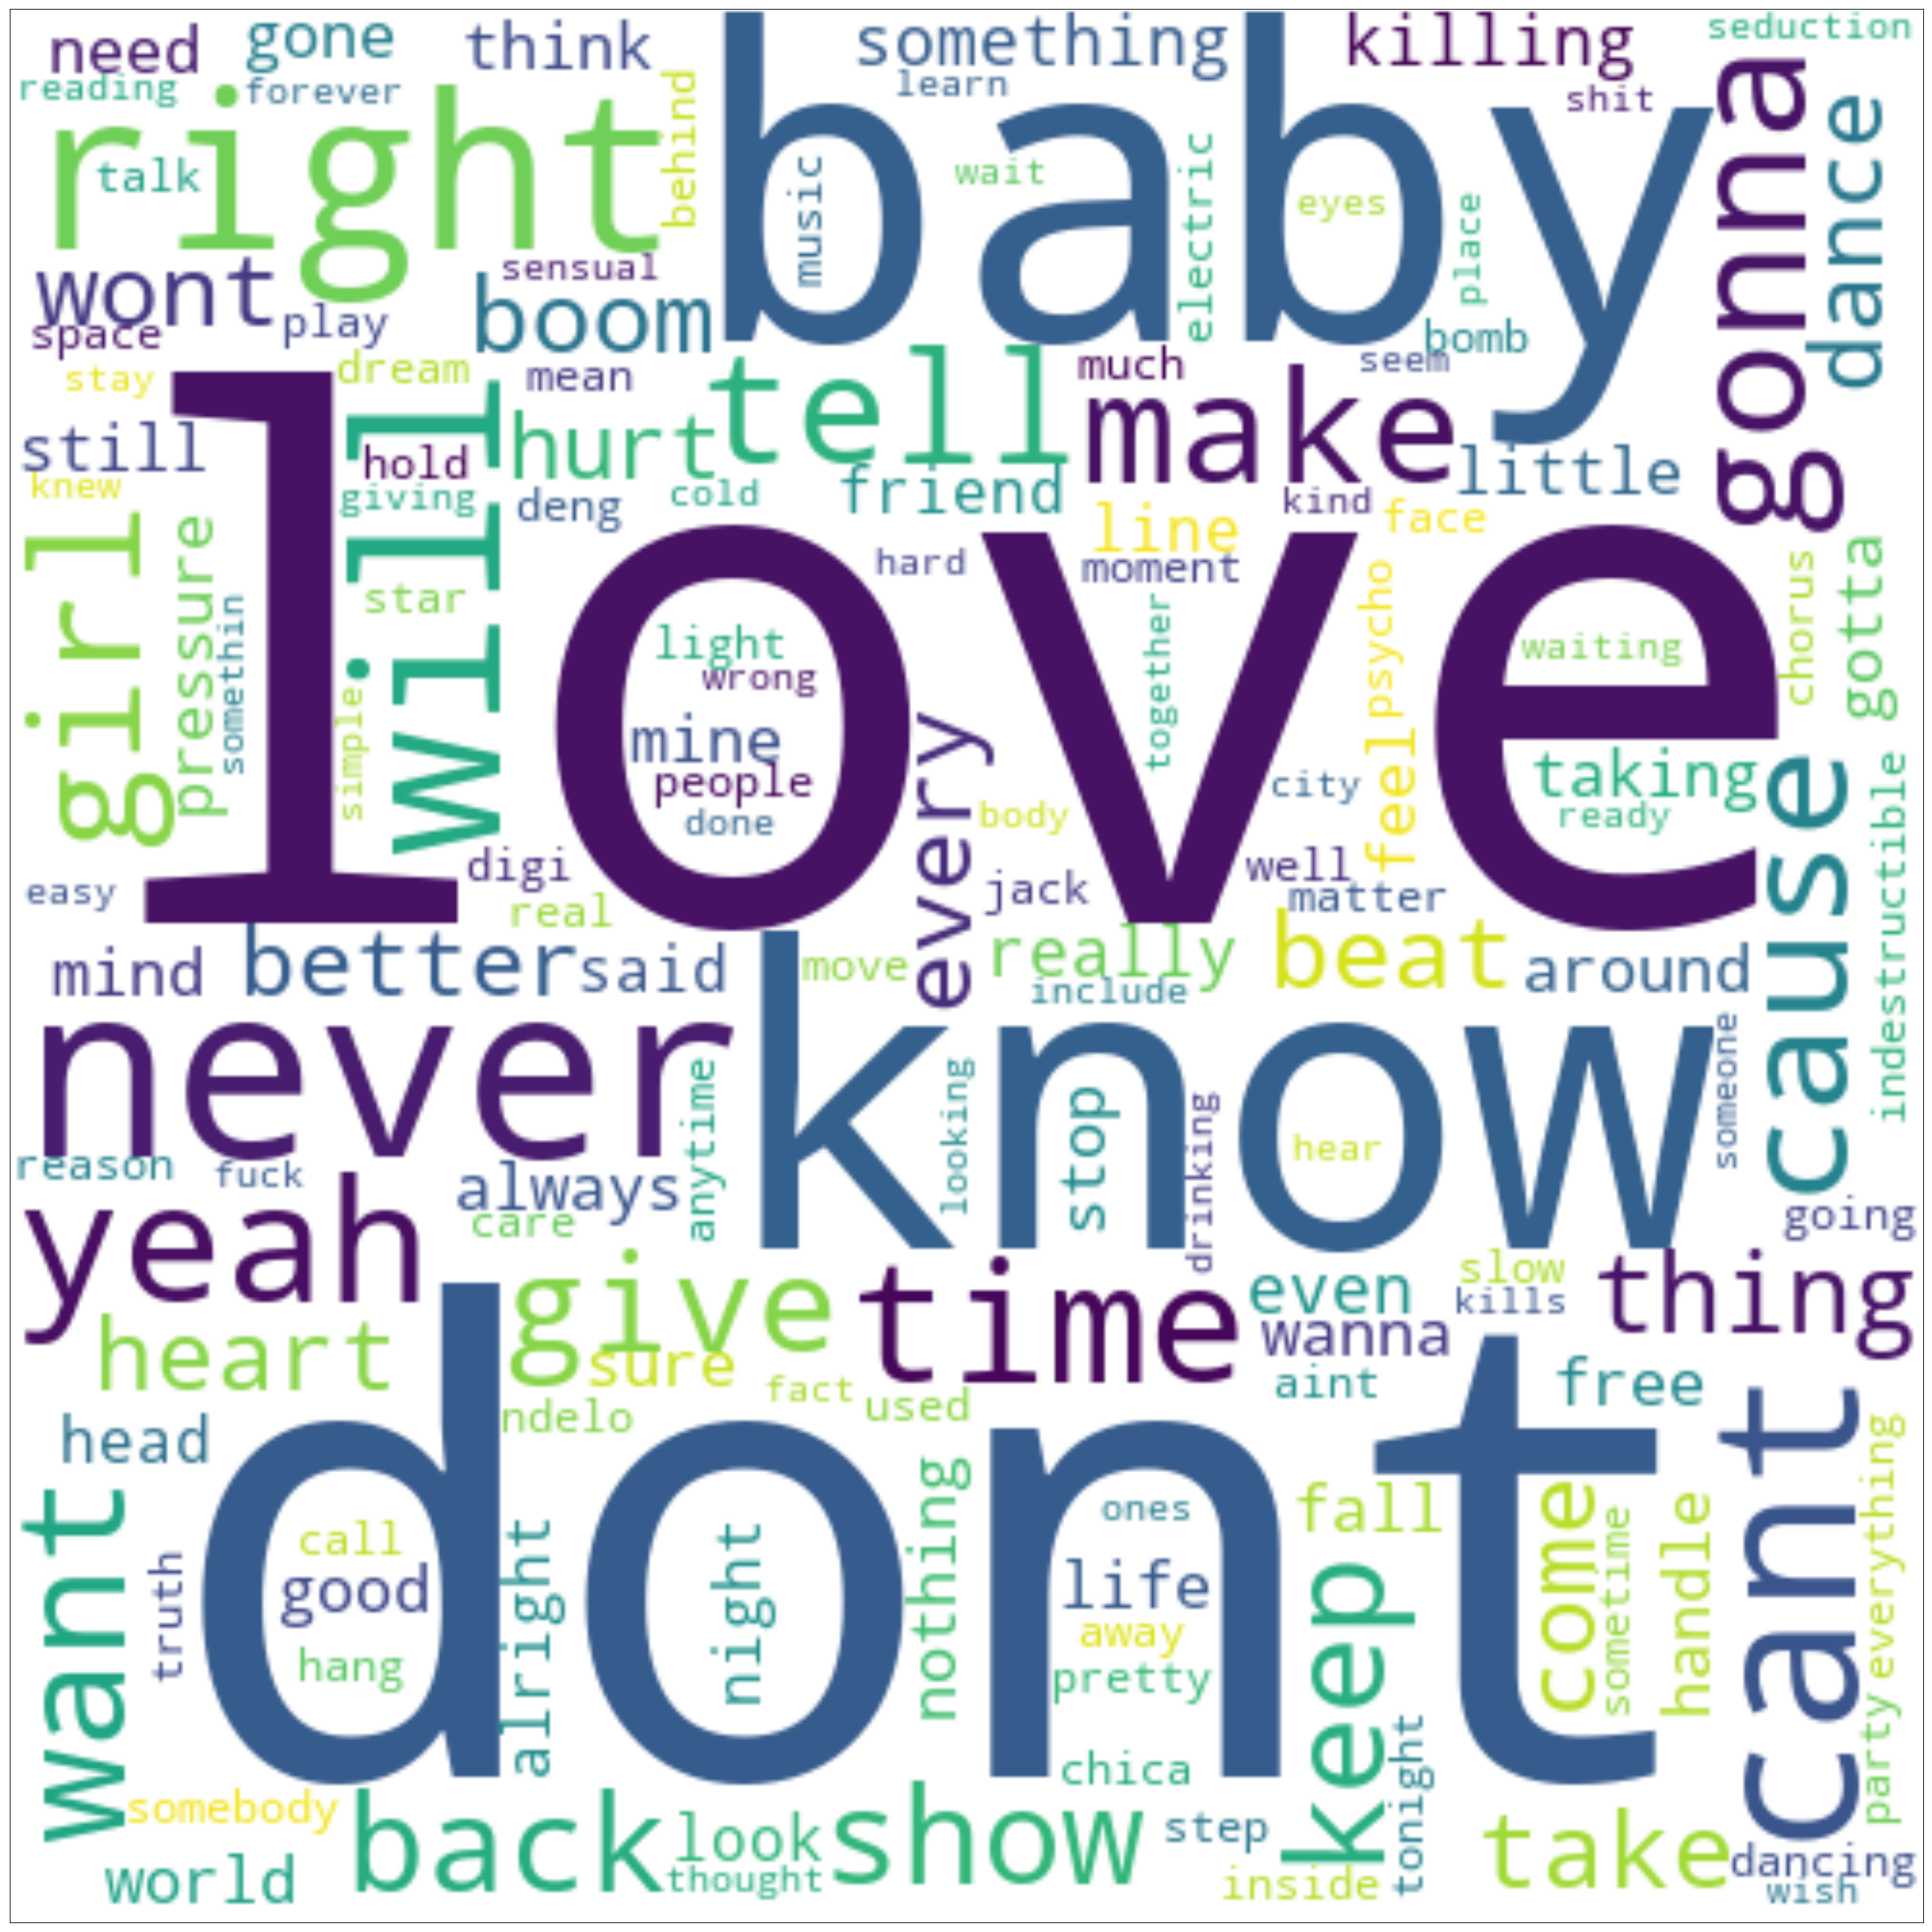

In [53]:
# all the lyrics 
lyrics = all_lyrics

mask = np.zeros((500, 500, 3), np.uint8)

mask.shape

#mask[150:350,50:350,:] = 255  # masked out area

cloud = wordcloud.WordCloud(background_color="white",
                max_words=150,
                mask=mask,
                collocations=False,  # calculates frequencies
                contour_color='steelblue').generate(lyrics) # <-- lyrics is a string
                # stop words are removed!

plt.figure(figsize = (40,40))
plt.imshow(cloud, interpolation='bilinear')
plt.savefig('Robyn_wordcloud2.png')
plt.xticks([])
plt.yticks([])
plt.show()

In [65]:
# Parse the words with RegEx
word = "\w{3,}"  # words with 3+ characters
all_words = re.findall(word, all_lyrics.lower())
#all_words

['gotta',
 'want',
 'really',
 'really',
 'want',
 'gotta',
 'need',
 'cause',
 'baby',
 'cant',
 'enough',
 'trying',
 'catch',
 'feeling',
 'used',
 'used',
 'feel',
 'back',
 'then',
 'saying',
 'that',
 'aint',
 'thing',
 'baby',
 'aint',
 'thing',
 'baby',
 'thing',
 'there',
 'nothing',
 'nothing',
 'said',
 'might',
 'wanna',
 'write',
 'this',
 'down',
 'know',
 'want',
 'really',
 'really',
 'want',
 'really',
 'need',
 'dont',
 'wanna',
 'pick',
 'your',
 'socks',
 'maybe',
 'really',
 'silly',
 'thing',
 'baby',
 'would',
 'just',
 'nice',
 'compromise',
 'saying',
 'that',
 'aint',
 'thing',
 'baby',
 'aint',
 'thing',
 'baby',
 'thing',
 'there',
 'nothing',
 'nothing',
 'saying',
 'that',
 'aint',
 'thing',
 'baby',
 'aint',
 'thing',
 'baby',
 'thing',
 'there',
 'nothing',
 'nothing',
 'maybe',
 'really',
 'silly',
 'thing',
 'baby',
 'would',
 'just',
 'nice',
 'compromise',
 'aint',
 'thing',
 'aint',
 'thing',
 'saying',
 'that',
 'aint',
 'thing',
 'baby',
 'aint',


In [56]:
# With a Counter Dictionary
c = Counter(all_words)
c.most_common(15)

[('that', 417),
 ('your', 357),
 ('love', 343),
 ('dont', 277),
 ('baby', 270),
 ('know', 260),
 ('like', 230),
 ('never', 222),
 ('what', 215),
 ('with', 215),
 ('just', 181),
 ('right', 173),
 ('this', 171),
 ('cant', 150),
 ('will', 148)]

#### LDA - Latent Dirichlet Allocation (for Topic Modeling)

In [58]:
cv = CountVectorizer(stop_words='english')

In [66]:
vec = cv.fit_transform(all_words)

In [67]:
len(cv.vocabulary_)

1921

In [86]:
#cv.vocabulary_

In [79]:
lda = LatentDirichletAllocation(n_components=10)
lda.fit(vec)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [80]:
c = lda.components_
c.shape

(10, 1921)

In [81]:
words = list(cv.vocabulary_.keys())
len(words)

1921

In [82]:
ctrans = c.T
ctrans.shape

(1921, 10)

In [83]:
df = pd.DataFrame(ctrans, index=words)
df.head() , df.shape

(          0    1     2    3    4    5    6    7    8    9
 gotta   0.1  0.1   0.1  0.1  0.1  0.1  0.1  0.1  0.1  1.1
 want    0.1  0.1  10.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
 really  0.1  0.1   0.1  0.1  0.1  1.1  0.1  0.1  0.1  0.1
 need    0.1  0.1   0.1  1.1  0.1  0.1  0.1  0.1  0.1  0.1
 cause   0.1  0.1   0.1  0.1  1.1  0.1  0.1  0.1  0.1  0.1, (1921, 10))

In [87]:
for i in range(10):
    print(df.sort_values(by=i, ascending=False)[i].head(7))
    print('-' * 40)

heartbeat      140.1
gettin         123.1
town            56.1
celebration     39.1
wanteven        25.1
south           25.1
wantoften       23.1
Name: 0, dtype: float64
----------------------------------------
twerk       343.1
hair        119.1
goodbye      89.1
bent         52.1
building     47.1
months       35.1
history      32.1
Name: 1, dtype: float64
----------------------------------------
able        181.1
hitting      79.1
shoot        51.1
week         35.1
high         29.1
bitching     26.1
wouldnt      24.1
Name: 2, dtype: float64
----------------------------------------
produced        45.1
chorusalways    45.1
special         41.1
seduction       39.1
compromise      31.1
believe         30.1
strange         23.1
Name: 3, dtype: float64
----------------------------------------
mess          270.1
guaranteed    130.1
stretch        86.1
momma          76.1
lesson         52.1
reasons        30.1
parents        24.1
Name: 4, dtype: float64
------------------------------